In [33]:
%pylab inline
import pandas_datareader.data as web
import datetime
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 19,12
import seaborn as sns
sns.set_context('poster',font_scale=1.4)
sns.set_palette('colorblind')
sns.set_style('darkgrid')
import plotly.graph_objs as go

Populating the interactive namespace from numpy and matplotlib


In [151]:
data = np.load('pontus_2002_area_depth_y1.npy')
dataX = data[:,1]
dataY = data[:,2]

from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(dataX.reshape(-1, 1), dataY.reshape(-1, 1))

# The coefficients
print('Coefficients: \n', regr.coef_, '')

Coefficients: 
 [[-2.11250929e-05]] 


In [152]:
regr.coef_[0][0]

-2.112509286636946e-05

In [153]:
regr.intercept_[0]

25.238106741928274

In [154]:
p1 = go.Scatter(x=dataX, 
                y=dataY, 
                mode='markers',
                name='data points',
                marker=dict(color='black', size=6)
               )

p2 = go.Scatter(x=dataX, 
                y=regr.predict(dataX.reshape(-1, 1)),
                mode='lines',
                name='linear fit',
                text='y = ' +str(regr.coef_[0][0]) + 'x + ' +str(regr.intercept_[0]),
                line=dict(color='violet', width=3)
                )

layout = go.Layout(xaxis=dict(title='area (degrees^2)',
                              zeroline=False),
                   yaxis=dict(title='median depth in i-band',
                              zeroline=False),
                   showlegend=False, 
                   title='baseline2018a Y10 linear fit')

fig = go.Figure(data=[p1, p2], layout=layout)

py.iplot(fig)


In [50]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [126]:
degree = 5
model = make_pipeline(PolynomialFeatures(degree), Ridge())
model.fit(dataX.reshape(-1, 1), dataY.reshape(-1, 1))
y_predict = model.predict(dataX.reshape(-1, 1))

p1 = go.Scatter(x=dataX, 
                y=np.log(dataY), 
                mode='markers',
                name='data points',
                marker=dict(color='black', size=6)
               )

p2 = go.Scatter(x=dataX, 
                y=np.log(model.predict(dataX.reshape(-1, 1))),
                mode='lines',
                name='fit',
                #text='y = ' +str(model.coef_[0][0]) + 'x^2 + ' +str(model.coef_[0][1]) + 'x + ' + str(model.intercept_[0]),
                line=dict(color='violet', width=3)
                )

layout = go.Layout(xaxis=dict(title='area (degrees^2)',
                              zeroline=False),
                   yaxis=dict(title='median depth in i-band',
                              zeroline=False),
                   showlegend=False, 
                   title='baseline2018a Y10 linear fit')

fig = go.Figure(data=[p1, p2], layout=layout)

py.iplot(fig)



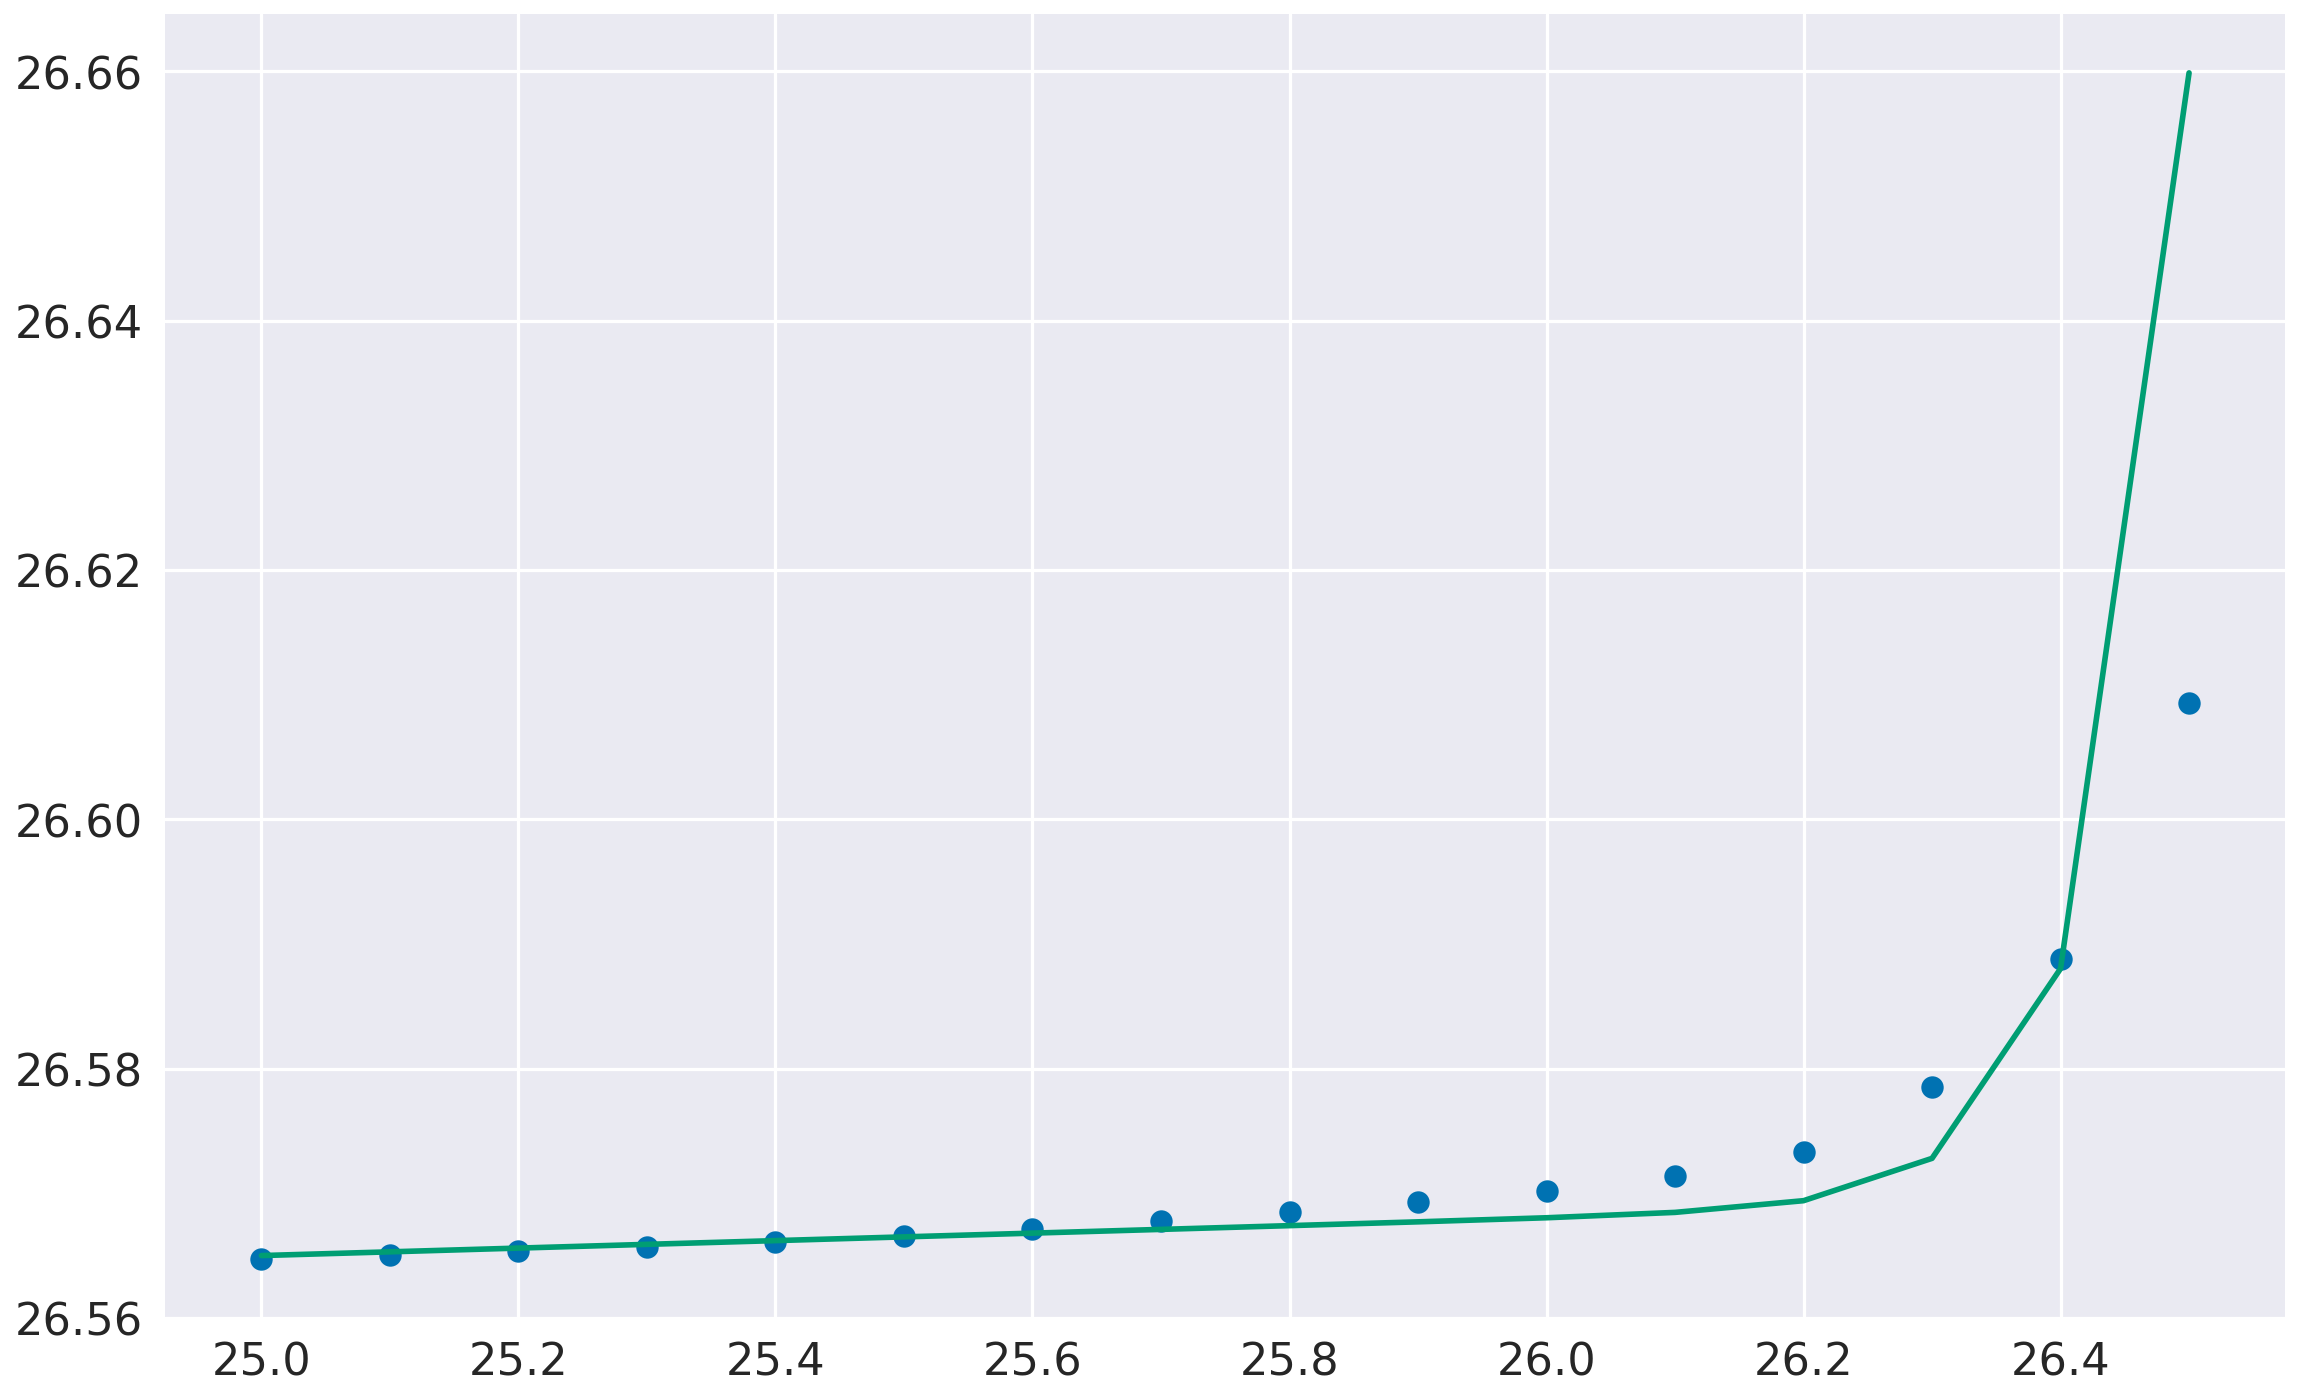

In [136]:
plt.plot(dataX, dataY, 'o')
plt.plot(dataX, 0.003*(dataX-25)*(1.0+np.exp(15*(dataX-26.3)))+26.565)

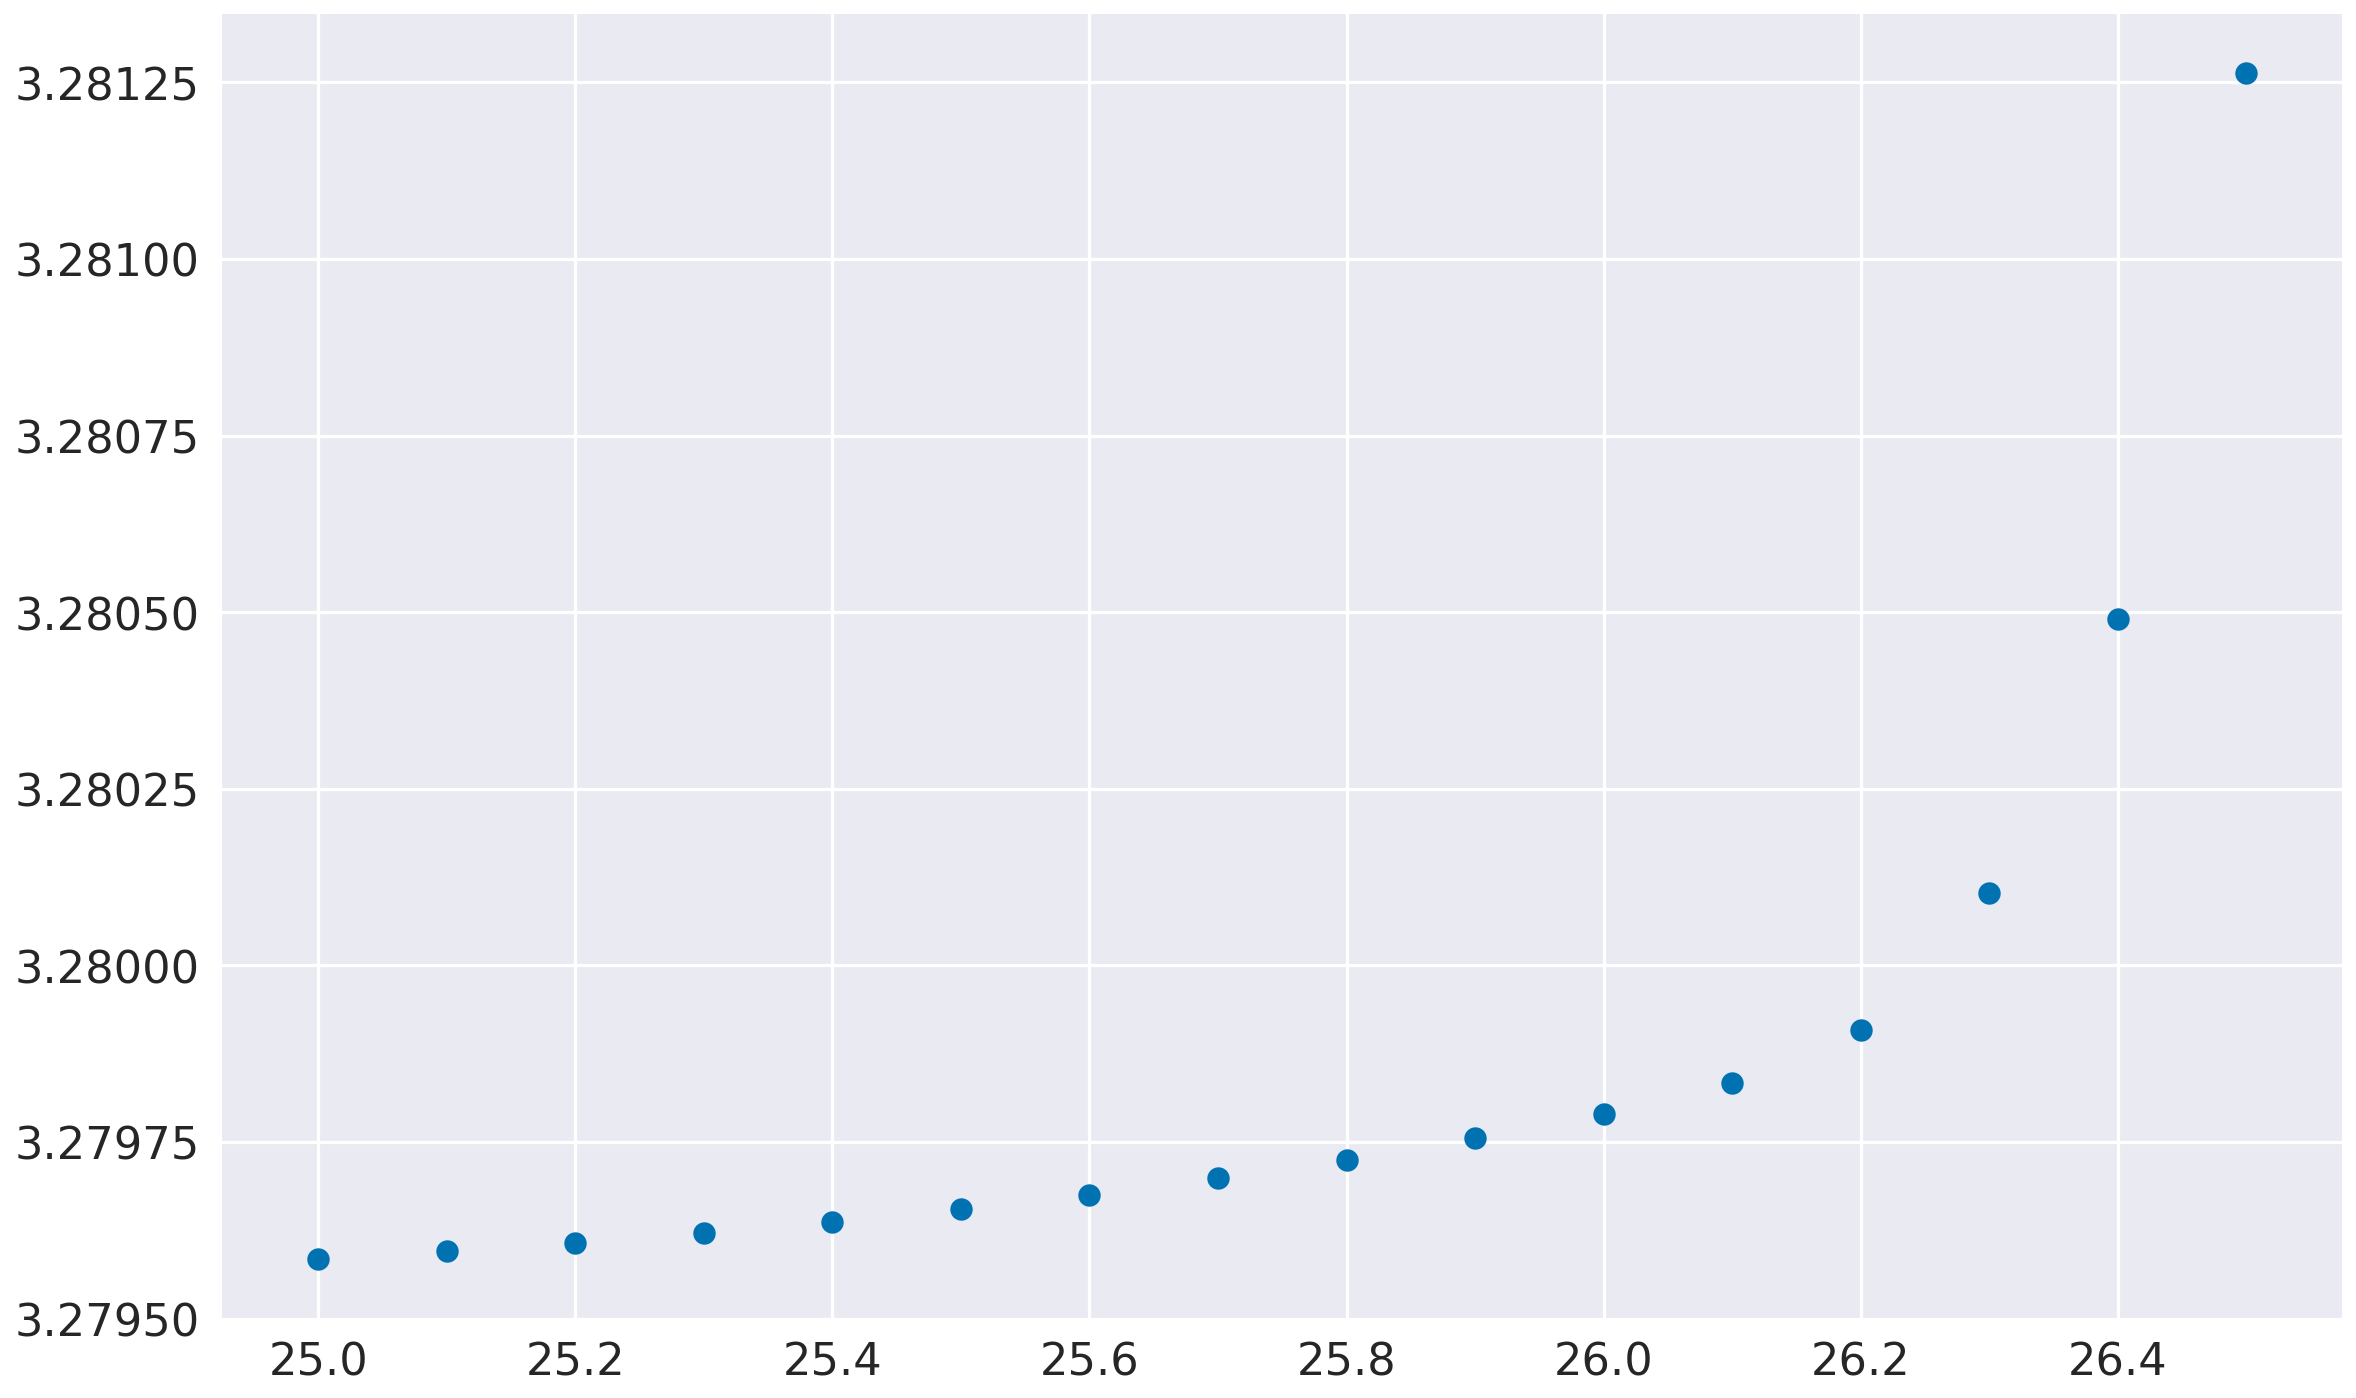

In [123]:
plt.plot(dataX, np.log(dataY),'o')

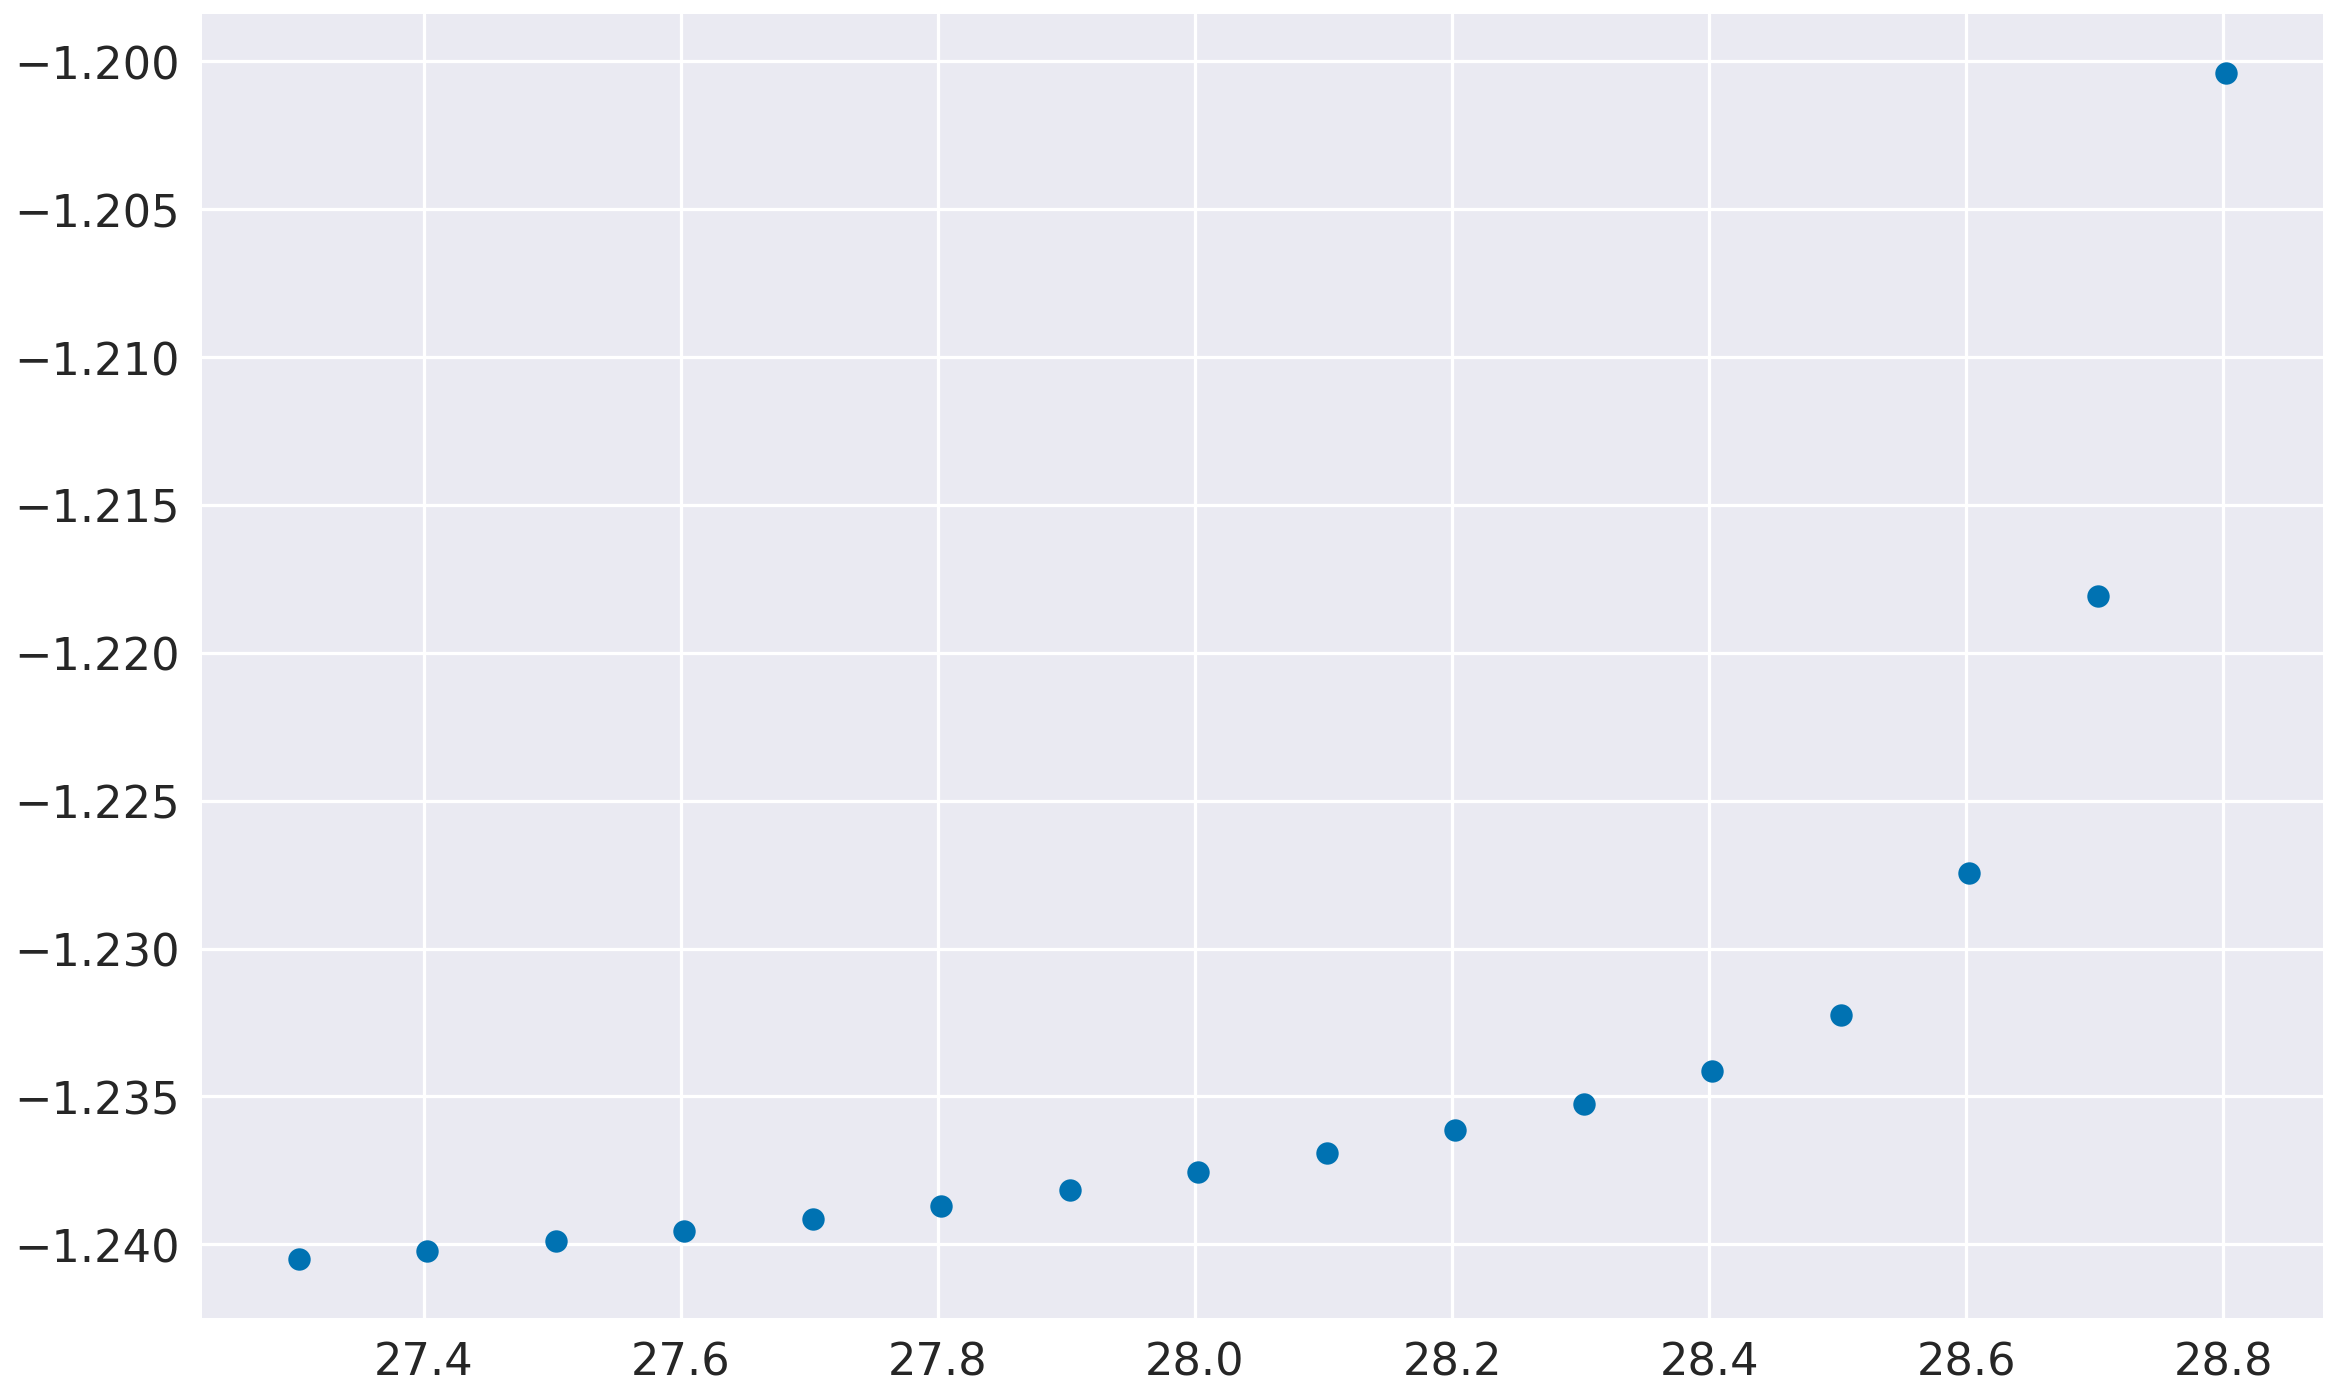

In [114]:
plt.plot(np.log(np.exp(dataX)*),np.log(np.log(np.log(np.log(np.log((dataY-25)**100))))),'o')
#plt.yscale('log')